# Study of Most Improving FIFA 19 Players 
Idea behind this report is to identify the players which when improved the most have the highest overall rating, for the least amount of money, so a cheap but very successful team can be bought and played with with further studies into which countries are proving the best improving players as FIFA can be a good scout for the future.
First step is to import all the tools I need, as well as the data. THe data can be found https://www.kaggle.com/karangadiya/fifa19/download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\DataEngineer04\Documents\Python\FIFA\data.csv')

Before looking into the data I will have a quick look at how the data correlates with itselfs;

In [2]:
data.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


But it's a lot easier to view this through a heat map;

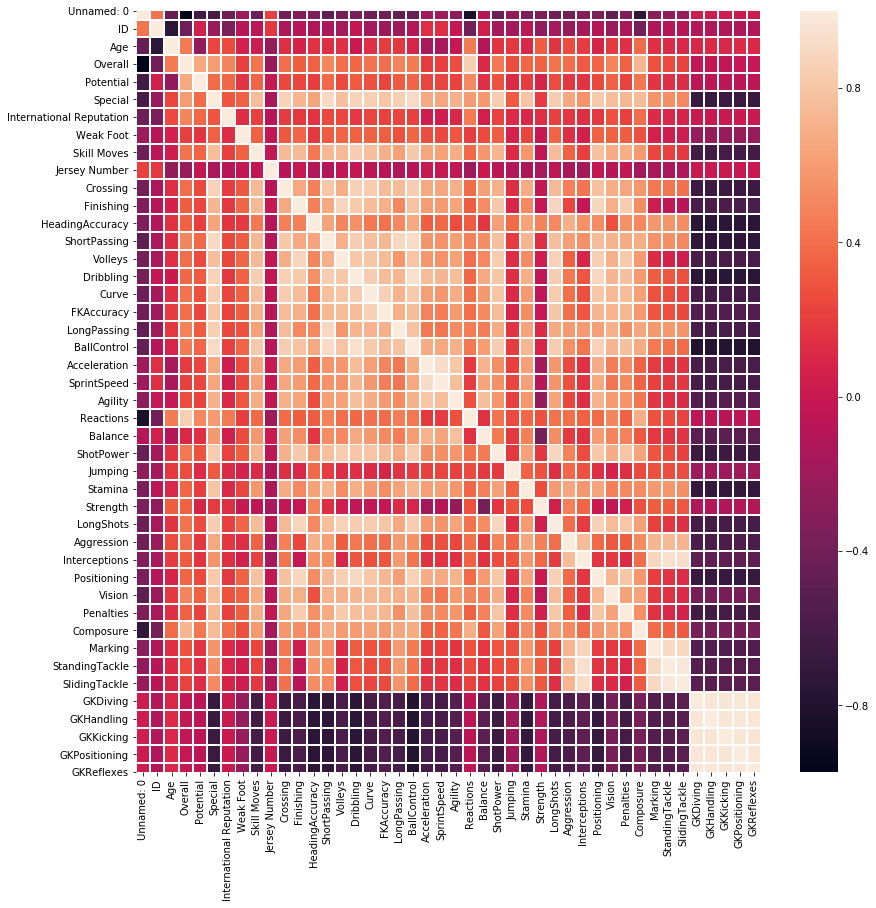

In [3]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), linewidth=1)


From the Heat Map there is a small correlation between a players ability to short pass, dribble, finishing, curve, FK accuracy, ball control and long passing, indicating that if a player is particulary good at one of these skills then the other will not be awful. Now to look at the columns the data provides for each player and some example data.

In [4]:
print(data.columns)
print('\n')
print('Rows, Columns',data.shape)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# Cleaning the Data
Before we can analyse the data needs to be cleaned, and beacuse we are trying to find a top cheap player we will be using the value column, but as shown above it currently is an object where we need it to be a integer. Because in the game you have to buy players they will have a release clause with their current club which is often much larger than their value. This clause is there so teams can get round difficult contract stipulations by paying through the nose for a player, e.g. if a player moves to a new club his release clause will be very high as that club have just bought him and don't want to sell. Same for top players like Messi whose release clause from Barcelona is 226 million compared to his value of 110 million.
First off is to get rid of the first 2 columns `Unamed 0` and `ID`, as these aren't needed and I will refer to players by their names.

In [7]:
data = data.drop(['Unnamed: 0','ID'],axis=1)
print(data.head(2))

                Name  Age                                           Photo  \
0           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   
1  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png   

  Nationality                                 Flag  Overall  Potential  \
0   Argentina  https://cdn.sofifa.org/flags/52.png       94         94   
1    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   

           Club                                     Club Logo    Value  ...  \
0  FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M  ...   
1      Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M  ...   

  Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0      96.0     33.0           28.0           26.0       6.0        11.0   
1      95.0     28.0           31.0           23.0       7.0        11.0   

  GKKicking GKPositioning GKReflexes Release Clause  
0      15.0          14.

In [8]:
print(data['Value'].head(5))

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object


By using the replace function each character can be replaced with nothing, apart from the player who are worth less than 1 million, as they will have a `K` after their sum, representing 1000. THe issue which is raised here is that with the characters removed a player worth 60 thousand will look the same as a player worth 60 million!
Therefore I will replace the `K` for 1000, the reason why I can't do this for the players worth millions is that quite a few of them have decimals as shown below.

In [9]:
data['Value'] = data['Value'].str.replace('€','').str.replace('M','').str.replace('K','000')
data['Release Clause'] = data['Release Clause'].str.replace('€','').str.replace('M','').str.replace('K','000')

In [10]:
print(data['Value'],data['Release Clause'])

0        110.5
1           77
2        118.5
3           72
4          102
         ...  
18202    60000
18203    60000
18204    60000
18205    60000
18206    60000
Name: Value, Length: 18207, dtype: object 0         226.5
1         127.1
2         228.1
3         138.6
4         196.4
          ...  
18202    143000
18203    113000
18204    165000
18205    143000
18206    165000
Name: Release Clause, Length: 18207, dtype: object


So now the players worth less than 1 million are worth the correct amount, it's time to focus on the players worth more than 1 million. To get rid of the decimal the `Value` column needs to be converted to a float and then rounded, a point to note is that Python rounds down but that isn't too much an issue here. Next step is to use the if statement to find any values under 1000 (Players worth Millions where just the `M` was removed) and multiply them by 1 million and replace it in the Value Column. As shown below;

In [11]:
rounded_value = round(data['Value'].astype(float))
data['Value'] = rounded_value
for value in data['Value']:
    data.loc[data['Value'] < 1000, 'Value'] = data['Value'] * 1000000
    
print(data['Value'])


0        110000000.0
1         77000000.0
2        118000000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64


The same formula for the `Value` column can now be used for the `Release Clause` column;

In [12]:
rounded_clause = round(data['Release Clause'].astype(float))
data['Release Clause'] = rounded_clause
for value in data['Release Clause']:
    data.loc[data['Release Clause'] < 1000, 'Release Clause'] = data['Release Clause'] * 1000000
    
print(data['Release Clause'])

0        226000000.0
1        127000000.0
2        228000000.0
3        139000000.0
4        196000000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64


But when looking at this data it's very difficult to quickly read 226,000,000 without the commas so by dividing the entire `Value` by 1 million it makes the data easier to read, this will also be applied to Release Clause

In [13]:
data['Value'] = data['Value']/1000000
data['Release Clause'] = data['Release Clause']/1000000
print(data['Value'],data['Release Clause'])

0        110.00
1         77.00
2        118.00
3         72.00
4        102.00
          ...  
18202      0.06
18203      0.06
18204      0.06
18205      0.06
18206      0.06
Name: Value, Length: 18207, dtype: float64 0        226.000
1        127.000
2        228.000
3        139.000
4        196.000
          ...   
18202      0.143
18203      0.113
18204      0.165
18205      0.143
18206      0.165
Name: Release Clause, Length: 18207, dtype: float64


# Analysing Data
Now the Values are in pounds and float form and can be used in calculations.

Because we are focused on the player improvements throught the game, a new column will need to be made displaying the difference between the current overall rating and the potential overall rating. Also as for our team we only want the best we will only include players whose potential rating will be higher than 85 overall.
The data will then be sorted by the `Potential` and `delta_rating` columns so we can see which are the best players who improve the most.

In [14]:
data['delta_rating'] = data['Potential']-data['Overall']
data['price_per_point'] = data['Value']/data['Potential']
pot_data = data[data['Potential'] > 80]
top_data = pot_data.loc[:,['Name','Age','Nationality','Overall','Potential','Club','Value','Position','delta_rating','Release Clause','price_per_point']]
sort_data = top_data.sort_values(['Potential','delta_rating'],ascending = False)
print(sort_data.head(7))

                  Name  Age Nationality  Overall  Potential  \
25           K. Mbappé   19      France       88         95   
15           P. Dybala   24   Argentina       89         94   
0             L. Messi   31   Argentina       94         94   
1    Cristiano Ronaldo   33    Portugal       94         94   
229      G. Donnarumma   19       Italy       82         93   
9             J. Oblak   25    Slovenia       90         93   
3               De Gea   27       Spain       91         93   

                    Club  Value Position  delta_rating  Release Clause  \
25   Paris Saint-Germain   81.0       RM             7           166.0   
15              Juventus   89.0       LF             5           154.0   
0           FC Barcelona  110.0       RF             0           226.0   
1               Juventus   77.0       ST             0           127.0   
229                Milan   29.0       GK            11            55.0   
9        Atlético Madrid   68.0       GK           

Now we can measure a player improvement its time to sort the data. Because in this ultimate team of cheap developemnt players we want the best options available we will need to sort the data into new datasets first, regarding a players position. THe formation I use most of FIFA is a 4-3-3 (which is also utilised by the mighty Liverpool FC) so the team will consist of;

1 Goalkeeper, position - `GK`

1 Left Back, made up of positions - `LB` and `LWB` (Left Back and Left wing back)
1 Right back, made up of positions - `RB` and `RWB` (Right Back and Right wing back)
2 Centre Backs, made up of positions - `CB`, `LCB` and `RCB` (Centre back, Left centre back and Right centre back)

1 Defensive Midfielder, made up of positions - `CDM`, `LDM` and `RDM` (Centre Defensive Midfield, Left Defensive Midfield and Right Defensive Midfield)
1 Centre Midfielder, made up of positions - `CM`, `LM` and `RM` (Centre Midfield, Left Midfield and Right Midfield)
1 Attacking Midfielder, made up of positions - `CAM`, `LAM` and `RAM` (Centre Attacking Midfield, Left Attacking Midfield and Right Attacking Midfield)

1 Left Wing/Forward, made up of positions - `LW` and `LF` (Left Wing and Left Forward)
1 Centre Forward/Stiker, made up of positions - `CF` and `ST` (Centre Forward and Striker)
1 Right Wing/Forward, made up of positions - `RW` and `RF` (Right Wing and Right Forward)

Each position will be assigned it's own variable and every player playing in said position will be entered;

Now that each position is separated the data can be sorted. By using the `value_counts` we can see what the biggest changes in rating are.

In [15]:
sort_data['delta_rating'].value_counts(ascending=True)

26      1
25      1
24      2
23      4
22     11
21     17
19     20
20     24
18     24
16     25
17     27
15     36
14     36
2      40
13     41
4      52
11     58
9      60
1      63
12     70
10     71
3      77
8      78
6      94
7     102
5     126
0     211
Name: delta_rating, dtype: int64

It's shown that some players really improve a lot, now to reduce the data further by only including players that improve by 10 points or more.
Also by displaying the value_counts for the value of each player it shows that these players are bargains with max value of 29 million Euros

In [16]:
filter_data = sort_data[sort_data['delta_rating']>10]
print(filter_data['Value'].value_counts(ascending=False))

2.000     103
1.000      50
4.000      44
3.000      37
6.000      23
7.000      16
10.000      9
0.975       9
5.000       8
0.650       7
0.925       7
0.675       6
12.000      6
0.400       5
0.800       4
14.000      4
0.725       4
0.550       4
8.000       4
0.625       3
0.500       3
0.450       3
0.000       3
0.280       3
0.350       3
16.000      3
0.525       3
0.950       3
0.850       3
0.600       2
0.475       2
11.000      2
0.875       2
0.750       2
18.000      1
0.775       1
13.000      1
0.190       1
0.575       1
0.700       1
29.000      1
Name: Value, dtype: int64


In [17]:
gk = filter_data[filter_data['Position']== 'GK']

lb = filter_data[(filter_data['Position']== 'LB')|(filter_data['Position']=='RWB')]
rb = filter_data[(filter_data['Position']== 'RB')|(filter_data['Position']=='RWB')]
cb = filter_data[(filter_data['Position']== 'CB')|(filter_data['Position']=='LCB')|(filter_data['Position']=='RCB')]

cdm = filter_data[(filter_data['Position']== 'CDM')|(filter_data['Position']=='LDM')|(filter_data['Position']=='RDM')]
cam = filter_data[(filter_data['Position']== 'CAM')|(filter_data['Position']=='LAM')|(filter_data['Position']=='RAM')]
cm = filter_data[(filter_data['Position']== 'CM')|(filter_data['Position']=='LM')|(filter_data['Position']=='RM')]

lw = filter_data[(filter_data['Position']== 'LW')|(filter_data['Position']=='LF')]
rw = filter_data[(filter_data['Position']== 'RW')|(filter_data['Position']=='RF')]
st = filter_data[(filter_data['Position']== 'ST')|(filter_data['Position']=='CF')]

now to display the Top 5 players for each position;

In [18]:
print(gk.head(5))

               Name  Age Nationality  Overall  Potential               Club  \
229   G. Donnarumma   19       Italy       82         93              Milan   
734       A. Lafont   19      France       78         90         Fiorentina   
1763       A. Meret   21       Italy       75         89             Napoli   
1544       A. Lunin   19     Ukraine       76         88         CD Leganés   
9935     C. Früchtl   18     Germany       65         86  FC Bayern München   

      Value Position  delta_rating  Release Clause  price_per_point  
229    29.0       GK            11            55.0         0.311828  
734    14.0       GK            12            27.0         0.155556  
1763   12.0       GK            14            28.0         0.134831  
1544   10.0       GK            12             NaN         0.113636  
9935    1.0       GK            21             3.0         0.011628  


From GK I think a good option would be `C. Früchtl` as he is so cheap but `A. Lunin` is the best option because he will become a better keeper overall and has no release clause.

In [19]:
dream_team = pd.DataFrame()
dream_team[1544] = filter_data.loc[1544,:]
print(lb.head(5))

              Name  Age Nationality  Overall  Potential                 Club  \
8624      G. Itter   19     Germany       67         85        VfL Wolfsburg   
6690      S. Nsoki   19      France       68         84  Paris Saint-Germain   
14435  J. Vagnoman   17     Germany       61         83         Hamburger SV   
8046      L. Kelly   19     England       67         83         Bristol City   
5658    B. Riveros   20    Paraguay       69         83        FC Basel 1893   

       Value Position  delta_rating  Release Clause  price_per_point  
8624     2.0       LB            18             3.0         0.023529  
6690     2.0       LB            16             4.0         0.023810  
14435    0.5       LB            22             1.0         0.006024  
8046     2.0       LB            16             4.0         0.024096  
5658     2.0       LB            14             4.0         0.024096  


For left back I choose `G. Itter` as he's the best there and a steal for 2-3 million, but a great second option would be `J. Vagnoman` as he's worth 500K and turns into a 83 rated left back

In [20]:
dream_team[8624] = filter_data.loc[8624,:]
print(cb.head(5))

              Name  Age Nationality  Overall  Potential  \
3776     B. Kamara   18      France       72         88   
1110  D. Upamecano   19      France       77         88   
7952    A. Bastoni   19       Italy       67         87   
2233   Diogo Leite   19    Portugal       74         87   
3400    F. Romagna   21       Italy       72         86   

                        Club  Value Position  delta_rating  Release Clause  \
3776  Olympique de Marseille    6.0       CB            16            15.0   
1110              RB Leipzig   13.0      LCB            11            25.0   
7952                   Parma    2.0       CB            20             NaN   
2233                FC Porto   10.0       CB            13            25.0   
3400                Cagliari    6.0      RCB            14            14.0   

      price_per_point  
3776         0.068182  
1110         0.147727  
7952         0.022989  
2233         0.114943  
3400         0.069767  


For the centre back partnership I am choosing `A. Bastoni` as he turns into an 87 defender, is dirt cheap nad has no release clause. The second player would be `B. Kamara` as he develops into the top centre back and costs the least (outside of `A. Bastoni`).

In [21]:
dream_team[3776] = filter_data.loc[3776,:]
dream_team[7952] = filter_data.loc[7952,:]
print(rb.head(5))

             Name  Age  Nationality  Overall  Potential               Club  \
7525     K. Rüegg   19  Switzerland       68         85          FC Zürich   
7367    M. Aarons   18      England       68         84       Norwich City   
7388     R. Gumny   20       Poland       68         84        Lech Poznań   
7620     R. James   18      England       68         84     Wigan Athletic   
3451  Diogo Dalot   19     Portugal       72         84  Manchester United   

      Value Position  delta_rating  Release Clause  price_per_point  
7525    2.0       RB            17             4.0         0.023529  
7367    2.0       RB            16             4.0         0.023810  
7388    2.0       RB            16             4.0         0.023810  
7620    2.0       RB            16             4.0         0.023810  
3451    5.0       RB            12            10.0         0.059524  


Here the top choice is `K. Rüegg` as he is the only defender who gets to 85 and costs the same as the rest of the players on the list.

In [22]:
dream_team[7525] = filter_data.loc[7525,:]
print(cdm.head(5))

              Name  Age Nationality  Overall  Potential          Club  Value  \
7414     S. Tonali   18       Italy       68         89       Brescia    2.0   
1450     Marc Roca   21       Spain       76         87  RCD Espanyol   12.0   
10801    E. Ampadu   17       Wales       65         86       Chelsea    1.0   
2743      A. Maier   19     Germany       73         86    Hertha BSC    8.0   
12166  E. Loiodice   17      France       63         85     Dijon FCO    0.8   

      Position  delta_rating  Release Clause  price_per_point  
7414       CDM            21             5.0         0.022472  
1450       CDM            11            26.0         0.137931  
10801      LDM            21             3.0         0.011628  
2743       LDM            13            17.0         0.093023  
12166      LDM            22             2.0         0.009412  


Again no contest here the best choice for a top Centre defensive midfielder is `S. Tonali`.

In [23]:
dream_team[7414] = filter_data.loc[7414,:]
print(cm.head(5))

              Name  Age Nationality  Overall  Potential  \
6102    Riqui Puig   18       Spain       69         89   
1004     J. Sancho   18     England       77         89   
3146      E. Barco   19   Argentina       73         88   
1800  R. Sessegnon   18     England       75         88   
3692     A. Davies   17      Canada       72         87   

                        Club  Value Position  delta_rating  Release Clause  \
6102            FC Barcelona    2.0       CM            20             6.0   
1004       Borussia Dortmund   14.0       RM            12            28.0   
3146          Atlanta United    8.0       LM            15            18.0   
1800                  Fulham   12.0       LM            13            30.0   
3692  Vancouver Whitecaps FC    6.0       RM            15            13.0   

      price_per_point  
6102         0.022472  
1004         0.157303  
3146         0.090909  
1800         0.136364  
3692         0.068966  


The top choice is the best choice again, as `Riqui Puig` develops into an 89 level centre midfielder and costs almost a quarter of the competition.

In [24]:
dream_team[6102] = filter_data.loc[6102,:]
print(cam.head(5))

            Name  Age     Nationality  Overall  Potential               Club  \
5007  Kangin Lee   17  Korea Republic       70         88        Valencia CF   
2903    P. Foden   18         England       73         88    Manchester City   
1522    A. Ćorić   21         Croatia       76         88               Roma   
9485     S. Diop   18          France       66         87          AS Monaco   
8191    A. Gomes   17         England       67         87  Manchester United   

      Value Position  delta_rating  Release Clause  price_per_point  
5007    4.0      CAM            18            10.0         0.045455  
2903    8.0      CAM            15            20.0         0.090909  
1522   14.0      CAM            12            27.0         0.159091  
9485    2.0      CAM            21             4.0         0.022989  
8191    2.0      CAM            20             4.0         0.022989  


There are a few options for the centre attacking midfielder, as the top 5 only differ by 1 point, so `S. Diop`, `A. Gomes` are great choices because they both have low value and release clauses, another good choice would be `Kangin Lee` but as `S. Diop`'s release clause is less than half of Lee's and only dropping 1 overall point, I choose `S. Diop`.

In [25]:
dream_team[9485] = filter_data.loc[9485,:]
print(lw.head(5))

                 Name  Age  Nationality  Overall  Potential             Club  \
1143  Vinícius Júnior   17       Brazil       77         92      Real Madrid   
3252       João Félix   18     Portugal       72         88       SL Benfica   
5121   C. Hudson-Odoi   17      England       70         87          Chelsea   
6559      Brahim Díaz   18        Spain       69         86  Manchester City   
1820      J. Kluivert   19  Netherlands       75         86             Roma   

      Value Position  delta_rating  Release Clause  price_per_point  
1143   18.0       LW            15            47.0         0.195652  
3252    6.0       LW            16            17.0         0.068182  
5121    4.0       LW            17             9.0         0.045977  
6559    2.0       LW            17             5.0         0.023256  
1820   11.0       LW            11            21.0         0.127907  


`Vinícius Júnior` is by far the best player on this list but his release clause is 47 million! Far too much so I am picking `C. Hudson-Odoi` as he has the lowest overall cost and still returns to 87.

In [26]:
dream_team[5121] = filter_data.loc[5121,:]
print(st.head(5))

               Name  Age Nationality  Overall  Potential          Club  Value  \
7758    P. Pellegri   17       Italy       67         88     AS Monaco    2.0   
6032         J. Arp   18     Germany       69         88  Hamburger SV    2.0   
3418        M. Kean   18       Italy       72         87      Juventus    6.0   
1740   Felipe Vizeu   21      Brazil       75         87       Udinese   12.0   
11457   W. Geubbels   16      France       64         86     AS Monaco    1.0   

      Position  delta_rating  Release Clause  price_per_point  
7758        ST            21             5.0         0.022727  
6032        ST            19             5.0         0.022727  
3418        ST            15            15.0         0.068966  
1740        ST            12            24.0         0.137931  
11457       ST            22             3.0         0.011628  


For the striker it's a 50:50 pick between `P. Pellegri` and `J. Arp` as they bost cost the same and develop to 88. So I will choose `P. Pellegri` as his change in development is higher.

In [27]:
dream_team[7758] = filter_data.loc[7758,:]
print(rw.head(5))

              Name  Age  Nationality  Overall  Potential  \
10087     T. Chong   18  Netherlands       65         85   
4849     R. Nelson   18      England       70         85   
5407      M. Diaby   18       France       70         85   
2797   R. Orsolini   21        Italy       73         85   
2382       S. Kalu   20      Nigeria       74         85   

                           Club  Value Position  delta_rating  Release Clause  \
10087         Manchester United    1.0       RW            20             3.0   
4849        TSG 1899 Hoffenheim    4.0       RW            15             NaN   
5407        Paris Saint-Germain    4.0       RW            15             9.0   
2797                    Bologna    7.0       RW            12             NaN   
2382   FC Girondins de Bordeaux   10.0       RW            11            20.0   

       price_per_point  
10087         0.011765  
4849          0.047059  
5407          0.047059  
2797          0.082353  
2382          0.117647  


There is an argument here to using a left wing player on the right wing as in FIFA they can play both sides so you can use another player from the LW group, as they are rated higher then this group, but I'm looking for a player for each position and so will pick `T. Chong` as he becomes a 85 rated player and costs by far the least in this group, `R. Nelson` also deserves a pick for having no release clause as well.

# Final Team
Now all the players have been picked and they have been moved to a new dataframe dreamteam as shown below.

In [28]:
dream_team[10087] = filter_data.loc[10087,:]
dream_team = dream_team.T
print(dream_team)

                 Name Age  Nationality Overall Potential  \
1544         A. Lunin  19      Ukraine      76        88   
8624         G. Itter  19      Germany      67        85   
3776        B. Kamara  18       France      72        88   
7952       A. Bastoni  19        Italy      67        87   
7525         K. Rüegg  19  Switzerland      68        85   
7414        S. Tonali  18        Italy      68        89   
6102       Riqui Puig  18        Spain      69        89   
9485          S. Diop  18       France      66        87   
5121   C. Hudson-Odoi  17      England      70        87   
7758      P. Pellegri  17        Italy      67        88   
10087        T. Chong  18  Netherlands      65        85   

                         Club Value Position delta_rating Release Clause  \
1544               CD Leganés    10       GK           12            NaN   
8624            VfL Wolfsburg     2       LB           18              3   
3776   Olympique de Marseille     6       CB       

Realised there are two ways to append the data to a new dataframe, so have included both ways.

In [29]:
other_team = filter_data.loc[[1544,8624,3776,7952,7525,7414,6102,9485,5121,7758,10087],:]
print(other_team)

                 Name  Age  Nationality  Overall  Potential  \
1544         A. Lunin   19      Ukraine       76         88   
8624         G. Itter   19      Germany       67         85   
3776        B. Kamara   18       France       72         88   
7952       A. Bastoni   19        Italy       67         87   
7525         K. Rüegg   19  Switzerland       68         85   
7414        S. Tonali   18        Italy       68         89   
6102       Riqui Puig   18        Spain       69         89   
9485          S. Diop   18       France       66         87   
5121   C. Hudson-Odoi   17      England       70         87   
7758      P. Pellegri   17        Italy       67         88   
10087        T. Chong   18  Netherlands       65         85   

                         Club  Value Position  delta_rating  Release Clause  \
1544               CD Leganés   10.0       GK            12             NaN   
8624            VfL Wolfsburg    2.0       LB            18             3.0   
3776  

# Countries with best youth development
In order to see which country has the most up and coming players, just need to use a simple `value_counts` on the `filter_data` for the country.

In [30]:
countries = filter_data['Nationality'].value_counts(ascending = False)
print(countries)

England                55
France                 42
Germany                33
Spain                  33
Italy                  28
Argentina              21
Brazil                 13
Belgium                12
Portugal               12
Scotland               10
Netherlands            10
United States           8
Colombia                8
Croatia                 7
Poland                  7
Switzerland             6
Nigeria                 6
Wales                   5
Senegal                 5
Denmark                 5
Norway                  5
Uruguay                 4
Japan                   4
Ukraine                 4
Mexico                  3
Serbia                  3
Austria                 3
Romania                 3
Sweden                  3
Ivory Coast             3
Greece                  2
Georgia                 2
South Africa            2
Russia                  2
Cameroon                2
Turkey                  2
Republic of Ireland     2
Iceland                 2
Canada      

From this result it shows England are providing the most players in terms of development 

Thank you for reading this porject, any comments on how it could be improved or how I could have done bits better or what else I could add in, please comment as trying to learn as much as possible. 